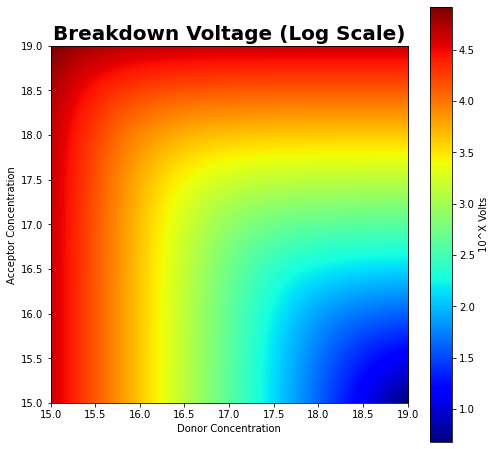

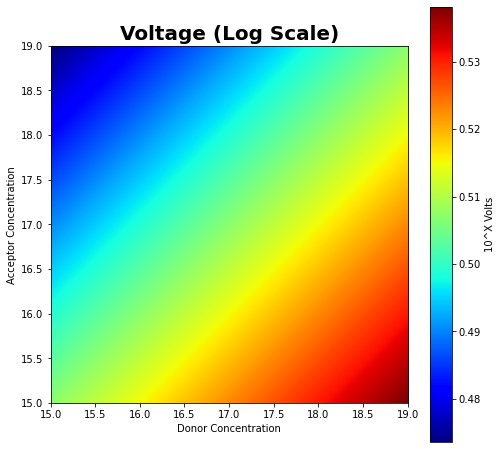

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

rcParams = matplotlib.rcParams
rcParams['font.size'] = 10.0
rcParams['axes.titlesize'] = 20.0
rcParams['font.weight'] = 'normal'
rcParams['axes.titleweight'] = 'bold'

q = 1.602e-19
E0 = 8.85e-14
KTq = 0.02585
Me = 0.18
Mh = 1
Nc = 1.2e18
Nv=4.6e19
Na = np.logspace(15, 19, 100)
Nd = np.logspace(15, 19, 100)

Ni = 1e-10
E = 8.9*E0
Ec = 4.1E6      # critical E-field breakdown in V/cm

Ncols = len(Na)
Nrows = len(Nd)

Voltage = np.empty((Ncols, Nrows))
Depletion = np.empty((Ncols, Nrows))
BreakdownVoltage = np.empty((Ncols, Nrows))
ElectricField = np.empty((Ncols, Nrows))

for ii in range(0, Ncols):
    for rr in range(0, Nrows):
        ln = np.log((Na[ii]*Nd[rr])/(Ni**2))
        Voltage[rr, ii] = KTq*ln
        
        two_E = (2*E)/q
        W0 = np.sqrt((two_E*Voltage[rr,ii]*((1/Na[ii]+1/Nd[rr]))))
        Depletion[rr, ii] = W0*1e-2

        qn = q*Nd[rr]/E
        N = (Na[ii]/(Nd[rr]*(Nd[rr]+Na[ii])))
        
        ElectricField[rr,ii] = (qn*np.sqrt(two_E*N*Voltage[rr,ii]))
        
        V = (((Ec/qn)**2)/(two_E*N))
        BreakdownVoltage[rr,ii] = Voltage[rr,ii]-V

plt.figure(figsize=(8,8))
ax = plt.axes()
ax.set_title('Breakdown Voltage (Log Scale)')
plt.xlabel('Donor Concentration')
plt.ylabel('Acceptor Concentration')
im = ax.imshow(np.log10(abs(BreakdownVoltage)), extent=[min(np.log10(Nd)), max(np.log10(Nd)), min(np.log10(Na)), max(np.log10(Na))], interpolation='gaussian', cmap='jet')
cbar = plt.colorbar(im)
cbar.set_label('10^X Volts')
plt.show()

plt.figure(figsize=(8,8))
ax = plt.axes()
ax.set_title('Voltage (Log Scale)')
plt.xlabel('Donor Concentration')
plt.ylabel('Acceptor Concentration')
im = ax.imshow(np.log10(abs(Voltage)), extent=[min(np.log10(Nd)), max(np.log10(Nd)), min(np.log10(Na)), max(np.log10(Na))], interpolation='gaussian', cmap='jet')
cbar = plt.colorbar(im)
cbar.set_label('10^X Volts')
plt.show()